In [1]:
import jax
import jax.numpy as jnp
import numpy as np
from diffrax import ODETerm, Tsit5


In [ ]:
Tsit5(),
y_solver, _, _, solver_state, _ = self.math_objects.solver.step(terms=self.math_objects.ode_term,
                                                                        t0=state.t, t1=t_next, y0=state.y_solver, args=self.constants.ode_constants,
                                                                        solver_state=state.solver_state, made_jump=False)

In [2]:
import diffrax

In [4]:
diffrax.Dopri5().init(

NameError: name 'Dopri5' is not defined

In [3]:
dir(diffrax)

['AbstractAdaptiveSolver',
 'AbstractAdaptiveStepSizeController',
 'AbstractAdjoint',
 'AbstractBrownianIncrement',
 'AbstractBrownianPath',
 'AbstractDIRK',
 'AbstractDiscreteTerminatingEvent',
 'AbstractERK',
 'AbstractESDIRK',
 'AbstractGlobalInterpolation',
 'AbstractImplicitSolver',
 'AbstractItoSolver',
 'AbstractLocalInterpolation',
 'AbstractPath',
 'AbstractProgressMeter',
 'AbstractRungeKutta',
 'AbstractSDIRK',
 'AbstractSRK',
 'AbstractSolver',
 'AbstractSpaceTimeLevyArea',
 'AbstractSpaceTimeTimeLevyArea',
 'AbstractStepSizeController',
 'AbstractStratonovichSolver',
 'AbstractTerm',
 'AbstractWrappedSolver',
 'BacksolveAdjoint',
 'Bosh3',
 'BrownianIncrement',
 'ButcherTableau',
 'CalculateJacobian',
 'ConstantStepSize',
 'ControlTerm',
 'CubicInterpolation',
 'DenseInterpolation',
 'DirectAdjoint',
 'DiscreteTerminatingEvent',
 'Dopri5',
 'Dopri8',
 'Euler',
 'EulerHeun',
 'Event',
 'FourthOrderPolynomialInterpolation',
 'GeneralShARK',
 'HalfSolver',
 'Heun',
 'Implicit

In [ ]:
def robotic_equation_n1(t, y, args):
    theta_1, dtheta_1, ddx_c  = y
    g, r_1, m_1, mu_1, I_1    = args
    return jnp.array([dtheta_1,
                      (-dtheta_1*mu_1 + ddx_c*m_1*r_1*jnp.cos(theta_1) + g*m_1*r_1*jnp.sin(theta_1))/(I_1 + m_1*r_1**2),
                      ddx_c
                    ])

In [5]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, ODETerm, SaveAt, Tsit5


def vector_field(t, y, args):
    prey, predator = y
    α, β, γ, δ = args
    d_prey = α * prey - β * prey * predator
    d_predator = -γ * predator + δ * prey * predator
    d_y = d_prey, d_predator
    return d_y


term = ODETerm(vector_field)
solver = Tsit5()
t0 = 0
t1 = 140
dt0 = 0.1
y0 = (10.0, 10.0)
args = (0.1, 0.02, 0.4, 0.02)
saveat = SaveAt(ts=jnp.linspace(t0, t1, 1000))
sol = diffeqsolve(term, solver, t0, t1, dt0, y0, args=args, saveat=saveat)

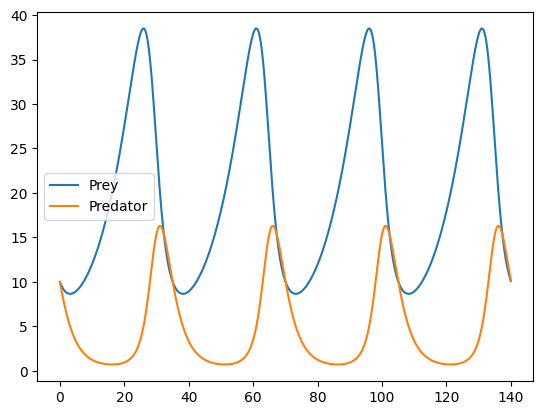

In [6]:
plt.plot(sol.ts, sol.ys[0], label="Prey")
plt.plot(sol.ts, sol.ys[1], label="Predator")
plt.legend()
plt.show()

In [12]:
import jax.numpy as jnp
from diffrax import ODETerm, Tsit5

vector_field = lambda t, y, args: -y
term = ODETerm(vector_field)
solver = Tsit5()

t0 = 0
dt0 = 0.05
t1 = 1
y0 = jnp.array(1.0)
args = None

tprev = t0
tnext = t0 + dt0
y = y0
state = solver.init(term, tprev, tnext, y0, args)
data = jnp.array([y0])
while tprev < t1:
    y, _, _, state, _ = solver.step(term, tprev, tnext, y, args, state, made_jump=False)
    print(f"At time {tnext} obtained value {y}")
    tprev = tnext
    tnext = min(tprev + dt0, t1)
    data = jnp.concatenate([data, jnp.array([y])])

At time 0.05 obtained value 0.9512293934822083
At time 0.1 obtained value 0.9048373699188232
At time 0.15000000000000002 obtained value 0.8607079386711121
At time 0.2 obtained value 0.8187307119369507
At time 0.25 obtained value 0.7788007259368896
At time 0.3 obtained value 0.7408181428909302
At time 0.35 obtained value 0.7046880125999451
At time 0.39999999999999997 obtained value 0.6703199744224548
At time 0.44999999999999996 obtained value 0.6376280784606934
At time 0.49999999999999994 obtained value 0.6065305471420288
At time 0.5499999999999999 obtained value 0.5769497156143188
At time 0.6 obtained value 0.5488115549087524
At time 0.65 obtained value 0.5220456719398499
At time 0.7000000000000001 obtained value 0.4965851902961731
At time 0.7500000000000001 obtained value 0.47236645221710205
At time 0.8000000000000002 obtained value 0.44932886958122253
At time 0.8500000000000002 obtained value 0.42741483449935913
At time 0.9000000000000002 obtained value 0.40656957030296326
At time 0.

In [13]:
data

Array([1.        , 0.9512294 , 0.90483737, 0.86070794, 0.8187307 ,
       0.7788007 , 0.74081814, 0.704688  , 0.67032   , 0.6376281 ,
       0.60653055, 0.5769497 , 0.54881155, 0.5220457 , 0.4965852 ,
       0.47236645, 0.44932887, 0.42741483, 0.40656957, 0.38674095,
       0.3678794 ], dtype=float32)

In [21]:
# import jax.numpy as jnp
# from diffrax import ODETerm, Tsit5

# def vector_field(t, y, args):
#     prey, predator = y
#     α, β, γ, δ = args
#     d_prey = α * prey - β * prey * predator
#     d_predator = -γ * predator + δ * prey * predator
    
#     return jnp.array([d_prey, d_predator])

# term = ODETerm(vector_field)
# solver = Tsit5()


# t0 = 0
# dt0 = 0.1
# t1 = 140
# y0 = jnp.array([10.0, 10.0])

# args = (0.1, 0.02, 0.4, 0.02)

# tprev = t0
# tnext = t0 + dt0
# y = y0
# state = solver.init(term, tprev, tnext, y0, args)
# data = jnp.array([y0])
# while tprev < t1:
#     y, _, _, state, _ = solver.step(term, t0=tprev, t1=tnext, y0=y, args=args, solver_state=state, made_jump=False)
#     print(f"At time {tnext} obtained value {y}")
#     tprev = tnext
#     tnext = min(tprev + dt0, t1)
#     data = jnp.concatenate([data, jnp.array([y])])

In [15]:
state

(Array(True, dtype=bool), (Array(0., dtype=float32), Array(0., dtype=float32)))

In [22]:
def robotic_equation_n1(t, y, args):
    theta_1, dtheta_1, ddx_c  = y
    g, r_1, m_1, mu_1, I_1    = args
    return jnp.array([dtheta_1,
                      (-dtheta_1*mu_1 + ddx_c*m_1*r_1*jnp.cos(theta_1) + g*m_1*r_1*jnp.sin(theta_1))/(I_1 + m_1*r_1**2),
                      ddx_c
                    ])

import jax.numpy as jnp
from diffrax import ODETerm, Tsit5

term = ODETerm(robotic_equation_n1)
solver = Tsit5()


t0 = 0
dt0 = 0.01
t1 = 4
y0 = jnp.array([jnp.pi, 0.6, 10.0])

args = (9.81, 0.1, 0.02, 0.4, 0.02)

tprev = t0
tnext = t0 + dt0
y = y0
state = solver.init(term, tprev, tnext, y0, args)
data = jnp.array([y0])
while tprev < t1:
    y, _, _, state, _ = solver.step(term, t0=tprev, t1=tnext, y0=y, args=args, solver_state=state, made_jump=False)
    print(f"At time {tnext} obtained value {y}")
    tprev = tnext
    tnext = min(tprev + dt0, t1)
    data = jnp.concatenate([data, jnp.array([y])])

At time 0.01 obtained value [ 3.1469893   0.48315793 10.100502  ]
At time 0.02 obtained value [ 3.1513252   0.38717306 10.202014  ]
At time 0.03 obtained value [ 3.1547897  0.3083061 10.304546 ]
At time 0.04 obtained value [ 3.1575382   0.24348792 10.408109  ]
At time 0.05 obtained value [ 3.159698    0.19019952 10.512712  ]
At time 0.060000000000000005 obtained value [ 3.1613739   0.14637332 10.618366  ]
At time 0.07 obtained value [ 3.1626515   0.11031234 10.725082  ]
At time 0.08 obtained value [ 3.1636014   0.08062376 10.832871  ]
At time 0.09 obtained value [ 3.1642814   0.05616436 10.941744  ]
At time 0.09999999999999999 obtained value [ 3.164739    0.03599594 11.05171   ]
At time 0.10999999999999999 obtained value [ 3.165013    0.01934836 11.162782  ]
At time 0.11999999999999998 obtained value [3.1651356e+00 5.5895317e-03 1.1274969e+01]
At time 0.12999999999999998 obtained value [ 3.1651328e+00 -5.7993084e-03  1.1388285e+01]
At time 0.13999999999999999 obtained value [ 3.1650262